# Tensor Calculus

General relativity is written in the language of tensors and differential geometry, both known for their difficulty. This is hopefully a gentler guide to both topics, one that preserves the essense of their mathematical beauty without baffling the mind.

In [1]:
import sympy as sp
from sympy.plotting.plot import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
sp.init_printing()

## Differential geometry prerequisites

### Parametric Equations

Parametric equations are equations where $x$ and $y$ are functions of a _free parameter_ $t$. For instance, the following is a parametric equation:

$$
\begin{cases}
x = \sin t \\
y = \cos t
\end{cases}
$$

Note that $x^2 + y^2 = \sin^2 (t) + \cos^2 (t) = 1$, so this is the parametric equation of the unit circle, as we will confirm below:

In [15]:
def plot_p2d_example():
    t = sp.Symbol("t")
    plt = plot_parametric(sp.sin(t), sp.cos(t), show=False, aspect_ratio=(1.0, 1.0))
    plt.show()

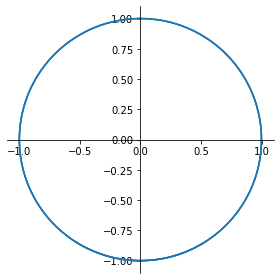

In [16]:
plot_p2d_example()

The same concept can be generalized with a 3D parametric equation:

In [20]:
def plot_p3d_example():
    t = sp.Symbol("t")
    plt = plot3d_parametric_line(sp.sin(t), sp.cos(t), t, show=False)
    plt.show()

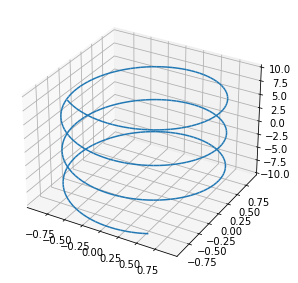

In [21]:
plot_p3d_example()

### Multivariable Calculus

The derivative is the rate of change of a function, and is defined by:

$$
\frac{df}{dx} = \lim_{a \rightarrow 0} \frac{f(x + a) - f(x)}{a}
$$

For multivariable functions, e.g. $f(x, y) = 2x^2y$, partial derivatives are used instead, where we find the derivative with respect to one variable and keep all the other variables constant. The partial derivative of a multivariable function $f(x_1, x_2, x_3, \dots, x_i, \dots, x_n)$ is defined by:

$$
\frac{\partial f}{\partial x^i} = \lim_{a \rightarrow 0} \frac{f(x_1, \dots, (x_i + a), \dots, x_n) + f(x_1, \dots, (x_i), \dots, x_n)}{a}
$$

For instance, for the function $f(x, y) = 2x^2 y$, the partial derivative with respect to $x$ is given by:

$$
\frac{\partial f}{\partial x} = \lim_{a \rightarrow 0} \frac{f(x + a, y) - f(x, y)}{a}
$$

And the partial derivative with respect to $y$ is given by:

$$
\frac{\partial f}{\partial y} = \lim_{a \rightarrow 0} \frac{f(x, y + a) - f(x, y)}{a}
$$

The (indefinite) integral is the inverse of the derivative, and is given by:

$$
\int f(x) dx = \lim_{\Delta x_a \rightarrow 0} \sum_{a = 1}^n f(x_a) \Delta x_a
$$

The indefinite integral is found by finding the antiderivative of a function; that is, a function $g(x)$ whose derivative is equal to $f(x)$ is the (indefinite) integral of $f(x)$. This is the 1st part of the fundamental theorem of calculus:

$$
g(x) = \int f(x) dx
$$

$$
\frac{dg}{dx} = f(x)
$$

The derivative and integral are inverses of each other; taking the integral, and then the derivative, returns your original function. Thus we have the 2nd part of the fundamental theorem of calculus:

$$
\int_a^b f(x) dx = g(b) - g(a)
$$

Evaluating the indefinite integral between two points, $a$ and $b$, gives the signed area under the curve between $x = a$ and $x = b$. This is the definite integral:

$$
A(a, b) = \int_a^b f(x) dx
$$

The **chain rule** for derivatives of a composite function $f(g(x))$ is given as:

$$
\sigma (x) = \frac{df}{dx}
$$

$$
\frac{df(g(x))}{dx} = \sigma(g(x)) \frac{dg}{dx}
$$

For instance, the derivative of $f(x) = \sin(x^3)$ could be calculated as folows:

$$
\frac{df}{dx} = \sigma(g(x)) \cdot \frac{d (x^3)}{dx}
$$

$$
\frac{df}{dx} = -\cos(x^3) \cdot 3x^2
$$

$$
\frac{df}{dx} = -3\cos(x^3)x^2
$$

The **multivariable chain rule** for derivatives of a composite function is based on the single-variable version. For a function $f(x, y) = (x(t), y(t))$, the derivative with respect to $t$ is given by:

$$
\frac{df}{dt} = \frac{\partial f}{\partial x} \frac{dx}{dt} + \frac{\partial f}{\partial y} \frac{dy}{dt}
$$

The more general form of the chain rule with a multivariable function $f(q_1, q_2, q_3, \dots, q_n) = (q_1(t), q_2(t), q_3(t), \dots, q_n(t))$ is given by:

$$
\frac{df}{dt} = \sum_i^n \frac{\partial f}{\partial q^i} \frac{d q^i}{dt}
$$

For instance, we could calculate the partial derivative of $f(x, y) = 2x^2 y$ with respect to $x$. Let's say that $x(t) = 3t^5 + 5$ and $y(t) = 7 \sqrt{t}$. We can then calculate our derivative with respect to $t$ like so:

$$
d'(f, t) = \partial'(2x^2 y, x) \cdot d'(3t^5 + 5, t) + \partial'(2x^2 y, y) \cdot d'(7\sqrt{t}, t)
$$

$$
\frac{df}{dt} =
\frac{\partial (2x^2 y)}{\partial x} \frac{d (3t^5 + 5)}{dt} +
\frac{\partial (2x^2 y)}{\partial y} \frac{d (7 \sqrt{t})}{dt}
$$

$$
\frac{df}{dt} = 4xy \cdot 15t^4 + \frac{2x^2}{2 \sqrt{t}}
$$

$$
\frac{df}{dt} = \frac{x \left(60 t^{\frac{9}{2}} y + x\right)}{\sqrt{t}}
$$

The **gradient** of a multivariable function takes a function and produces a vector field (assigns a vector to each point). The vector follows 2 attributes:

- Its direction is in the direction of greatest increase
- Its magnitude is proportional to the steepness (rate of increase)

In Cartesian coordinates, the gradient of a function $f(x, y)$ is defined using the nabla ($\nabla$) symbol as follows:

$$
\nabla f =
\begin{bmatrix}
\partial'(f, x) \\
\partial'(f, y)
\end{bmatrix}
$$

For example, let's take the gradient of $f(x, y) = x^2 - y^2$. The gradient at each point $(x, y, z)$ would be then given by:

$$
\nabla f =
\begin{bmatrix}
\partial'(f, x) \\
\partial'(f, y)
\end{bmatrix} =
\begin{bmatrix}
2x \\
-2y
\end{bmatrix}
$$

Or more generally, of a function $f(q_1, q_2, q_3, \dots, q_n)$:

$$
\nabla f =
\begin{bmatrix}
\partial'(f, q_1) \\
\partial'(f, q_2) \\
\partial'(f, q_3) \\
\vdots \\
\partial'(f, q_n)
\end{bmatrix}
$$

To intuitively understand the gradient, take a look at the graph of $f(x, y)$:

In [8]:
def plot_fxy():
    x, y = sp.symbols("x y")
    f_2 = x ** 2 - y ** 2
    plot3d(f_2)

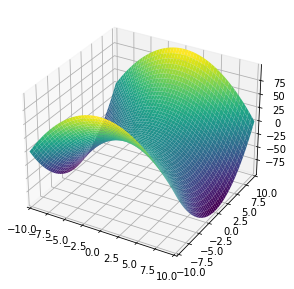

In [9]:
plot_fxy()

Let's now take a look at its gradient:

In [10]:
def gradient(f):
    x, y = sp.symbols("x y")
    return (f.diff(x), f.diff(y))

def plot_vecfield(g, description):
    xrange = np.linspace(-3,3,15)
    yrange = np.linspace(-3,3,15)
    X,Y = np.meshgrid(xrange, yrange)

    U=X
    V=Y

    for i in range(len(xrange)):
        for j in range(len(yrange)):
            x1 = X[i,j]
            y1 = Y[i,j]
            U[i,j] = g[0].subs({x:x1, y:y1})
            V[i,j] = g[1].subs({x:x1, y:y1})

    plt.quiver(X,Y,U,V, linewidth=1)
    plt.title(description)
    plt.show()

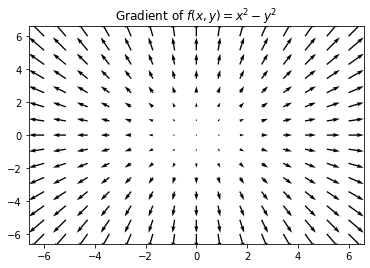

In [11]:
g = gradient(f_2)
plot_vecfield(g, "Gradient of $f(x, y) = x^2 - y^2$")

Note how the vectors all point outwards from the center towards the "hills" of the function, the direction of greatest increase.

The **directional derivative** is built on the gradient and gives the rate of change of a function with respect to any direction $\vec v$, rather than just the $x, y, z$ directions. It is defined as follows:

$$
\nabla_{\vec v} f = \frac{\partial f}{\partial \vec v} = \nabla f \cdot \vec v
$$

There are two other operations we can do on a vector field, other than the gradient - they are the **curl** and **divergence**, given as follows:

$$
\mathrm{grad}\: (f) = \nabla f
$$

$$
\mathrm{div}\: (f) = \nabla \cdot f
$$

$$
\mathrm{curl}\: (f) = \nabla \times f
$$

The Laplacian operator is the gradient of the divergence of a scalar field, given as follows:

$$
\mathrm{lapl}\: (f) = \nabla \cdot \nabla f = \nabla^2 f
$$

The **total differential** of a function $f(x, y)$ is given by:

$$
df = \frac{\partial f}{\partial x} dx + \frac{\partial f}{\partial y} dy
$$

### Tensors and tensor notation

A 3D vector in Cartesian coordinates can be written in terms of the basis vectors $(e_x, e_y, e_z)$:

$$
\vec V = a_x e_x + a_y e_y + a_z e_z
$$

Thus, we can write the sum more compactly as follows:

$$
\vec V_i = \sum_{i = 0}^3 a_i e_i
$$

In Einstein summation notation, the summation is implied, so we can more simply write our vector as:

$$
\vec V_i = a_i e_i
$$

When writing vectors as tensors, it's customary to put the indices on top (as superscripts) instead of on the bottom (subscripts). Note that these are **not** raising to a power. So we now have:

$$
\vec V \Rightarrow V^i
$$

Given two vectors $\vec A$ and $\vec J$, we can now write the inner product more succintly as:

$$
\vec A \cdot \vec J = A^i J^i
$$

And we can define other vector field operations, such as the gradient, using the same notation:

$$
\nabla f = \frac{\partial f}{\partial x^i}
$$

<div class="alert alert-block alert-info">
<b>Remember:</b> When writing tensors, the letters we use for the summed-over index are arbritary. We use $i$ because that's how we write summation most often, but we could use any letter we want. Later one, we'll use greek letters when denoting tensors in spacetime, but that's just a convention, not an absolute rule.
</div>

Contravariant tensors, usually just called vectors, are most generally written with Einstein summation convention. We denote their components with $V_i$ and their basis with $e_i$, so:

$$
\vec V = V^i e_i
$$

Covariant tensors, usually just called covectors, are also written using the convention. They are marked by a tilde over the letter, and are denoted (in terms of their basis $e^i$) as:

$$
\tilde V = V_i e^i
$$

Basis vectors and basis covectors obey the relation:

$$
e^i e_j = \delta^i{}_j
$$

So therefore, given a covector $\tilde A$ and a vector $\vec B$, we find that we end up with a scalar:

$$
\tilde A \vec B = A_i B^i e^i e_i = A_i B^i \delta^i{}_i = A_i B^i = S
$$

But what's most interesting about tensors is how they are defined, because they are defined in terms of _how they transform_. For instance, let's go through the formal definitions of contravariant and covariant tensors. They are defined like so:

Vectors (contravariant tensors) transform by the following transformation law from coordinate system $x^i$ to $x^{i'}$:

$$
V^{i'} = \frac{\partial x^{i'}}{\partial x^i} V^i
$$

We can also define contravariant tensors in a slightly different fashion: as the tangent vector to a parametrized curve in spacetime. The parameter used is most commonly $\tau$, the proper time. So:

$$
V^i = \frac{dx^i}{d\tau} =
\left(\frac{dx^0}{d\tau} + \frac{dx^1}{d\tau} + \frac{dx^2}{d\tau} + \frac{dx^3}{d\tau}\right)
$$

<div class="alert alert-block alert-info">
<b>Remember:</b> We are using the convention $(x^0, x^1, x^2, x^3) = (t, x, y, z)$
</div>

Covectors (covariant tensors) transform instead by the following transformation law:

$$
V_{i'} = \frac{\partial x^i}{\partial x^{i'}} V_i
$$

Again, we can also define covariant tensors with an alternate method. Consider a function $f(x^i)$, where again $x^i = (x^0, x^1, x^2, x^3) = (t, x, y, z)$. Its gradient would be given by:

$$
V_i = \frac{df}{dx^i}
= \left(\frac{\partial f}{\partial x^0}, 
\frac{\partial f}{\partial x^1}, 
\frac{\partial f}{\partial x^2}, 
\frac{\partial f}{\partial x^3}\right)
$$

The components of the gradient, given by $\frac{df}{dx^i}$, are the components of a covariant tensor.

So now, having seen how covariant tensors and contravariant tensors transform, we can more generally describe what a tensor is:

<div class="alert alert-block alert-info">
<b>Definition of a tensor:</b> A mathematical object represented by a collection of components that transform according to certain transformation laws.
</div>

The **type** $(m, n)$ of a tensor is given by how many upper indices ($m$) it has, and how many lower indices ($n$) it has. The total number of upper and lower indices is its **rank**.

Now, let's look through several typical tensors:

First, we have scalars, which are $(0, 0)$ or rank-0 tensors.

$$
S
$$

Then, we have vectors and covectors, both rank-1, which are respectively $(1, 0)$ and $(0, 1)$ tensors. We usually write vectors like this:

$$
V^i =
\begin{bmatrix}
a \\
b \\
c \\
d
\end{bmatrix}
$$

And we usually write covectors like this:

$$
V_i =
\begin{bmatrix}
a & b & c & d
\end{bmatrix}
$$

Multiplying a vector and a covector is taking their **tensor product**, which gives a rank-2 tensor, also called a matrix:

$$
V^\alpha \otimes V_\beta = {T^\alpha}_\beta
$$

$$
{T^\alpha}_\beta =
\begin{pmatrix}
T_{00} & T_{01} & T_{02} & T_{03} \\
T_{10} & T_{11} & T_{12} & T_{13} \\
T_{20} & T_{21} & T_{22} & T_{23} \\
T_{30} & T_{31} & T_{32} & T_{33} \\
\end{pmatrix}
$$

The tensor product is the primary way we construct new tensors in tensor calculus (which we'll use in differential geometry). Any two tensors can be multiplied through the tensor product, so we can use the tensor product to construct any tensor. Most importantly, because the tensor transformation rule is preserved every time we take the tensor product, we can now use it to define _any_ tensor. This is the most general **definition of a tensor**:

$$
\large T^{\mu_1' \mu_2' \dots \mu_m'}_{\: \: \nu_1' \nu_2' \dots \nu_n'}
\small =
\frac{\partial x^{\mu_1'}}{\partial x^{\mu_1}} \frac{\partial x^{\mu_2'}}{\partial x^{\mu_2}}
\dots
\frac{\partial x^{\mu_m'}}{\partial x^{\mu_m'}}
\otimes
\frac{\partial x^{\nu_1}}{\partial x^{\nu_1'}} \frac{\partial x^{\nu_2}}{\partial x^{\nu_2'}}
\dots
\frac{\partial x^{\nu_n}}{\partial x^{\nu_n'}}
\otimes
\large T^{\mu_1 \mu_2 \dots \mu_m}_{\: \: \nu_1 \nu_2 \dots \nu_n}
$$

This horribly long and scary-looking equation is what gives tensors their reputation for frying minds, but, reassuringly, you almost never need to use this definition in practice. However, the definition is really just a formalized version of a simple idea: a tensor is a combination of vector and covector transformations that preserve the tensor transformation law. We therefore arrive at the common but unhelpful observation that:

> "A tensor is anything that transforms like a tensor."

### Rules of Tensor Algebra

Scalar multiplication rule:

$$
T_{\alpha \beta} = k X_{\alpha \beta}
$$

Addition/subtraction rule:

$$
T^\alpha_{\: \: \beta} = A^\alpha_{\: \: \beta} \pm B^\alpha_{\: \: \beta}
$$

Multiplication rule (which raises the rank of a tensor):

$$
T^{\alpha \beta} = A^\alpha B^\beta
$$

$$
T^{\alpha \beta \gamma}_{\: \lambda} = (A^\alpha B^\beta) \: C^\gamma_{\: \lambda}
$$

Contraction rule (which lowers the rank of a tensor) by multiplying with another tensor with an equal index in the opposite position:

$$
T_{\lambda} = A^\alpha_{\: \lambda} B_\alpha
$$

$$
T_{\lambda} = A_{\alpha \lambda} B^\alpha
$$

The contraction rule also applies when a tensor has identical upper and lower indices:

$$
T^\gamma = T^{\alpha \gamma}_{\: \: \: \alpha}
$$

The contraction rule is also why we obtain a scalar (rank-0 tensor) when we contract a contravariant tensor with a covariant tensor:

$$
S = A^\alpha B_\alpha
$$

### Practical application: Newton's laws in Tensor Calculus

To rewrite Newton's laws of motion in tensor calculus is not difficult. For example, we can take $\vec F = m \vec a$ and rewrite with tensors as:

$$
F^i = m a^i
$$

However, note that the derivative must be written differently with the covariant derivative, so:

$$
F^i = m \nabla_{t} x^i = m \left(\frac{\partial x^i}{\partial t} + x^k \Gamma^{i}{}_{kt}\right)
$$

Our new form of Newton's (2nd) law is now valid in all coordinate systems. Obviously, though, no one writes Newton's laws in this way; this is just a demonstration. Instead, let's look at a more practical example.

### Practical application 2: Maxwell's equations in Tensor Calculus

When using tensor calculus to express Maxwell's equations, the advantages of tensors becomes much more clear. But first, let's take a look at Maxwell's typical laws (these are expressed in SI units):

$$
\nabla \cdot \vec E = \frac{\rho}{\epsilon_0}
$$

$$
\nabla \cdot \vec E = -\frac{\partial \vec B}{\partial t}
$$

$$
\nabla \cdot \vec B = 0
$$

$$
\nabla \cdot \vec B = \mu_0 \vec J + \mu_0 \epsilon_0 \frac{\partial \vec E}{\partial t}
$$

We can define an electromagnetic tensor $F_{ij}$ in terms of an electromagetic 4-potential $A^i$, like this:

$$
F_{ij} = \frac{\partial A_j}{\partial x^i} - \frac{\partial A_i}{\partial x^j}
$$

Where $A^i$ can then be used to write the electrical and magnetic fields:

$$
\vec E = - \nabla \phi - \frac{\partial \vec A}{\partial t}
$$

$$
\vec B = \nabla \times \vec A
$$

Now, using the electromagnetic field tensor, we can rewrite Maxwell's equation using just 2 tensor equations, which, like any tensor equation, is coordinate-independent:

$$
\nabla_{m} F_{i k}+\nabla_{k} F_{m i}+\nabla_{i} F_{k m}=0
$$

$$
\nabla_{i} F^{i k}=\mu_{0} j^k
$$

## Basic differential geometry

The line element of Euclidean 3D space in Cartesian coordinates is derived from the Pythagorean theorem, and is given by:

$$
dl^2 = dx^2 + dy^2 + dz^2
$$

This is equal to the inner product of the basis vectors of Euclidean space multiplied by the metric tensor:

$$
dl^2 =
\begin{bmatrix}
dx & dy & dz
\end{bmatrix}
\begin{bmatrix}
dx \\ dy \\ dz
\end{bmatrix}
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

Where the metric tensor is given by:

$$
g_{\alpha \beta} = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

In spherical coordinates, $(r, \theta, \phi)$, we recall that spherical coordinates are defined in terms of cartesian coordinates as follows:

$$
x = r \sin \theta \cos \phi \\
y = r \sin \theta \sin \phi \\
z = r \cos \theta
$$

Thus, after evaluating the differentials using the total differential rule, we find that:

$$
dx
= \frac{\partial x}{\partial r} dr + \frac{\partial x}{\partial \theta} d\theta + \frac{\partial x}{\partial \phi} d \phi \\
= \sin \theta \cos \phi dr + r \cos \theta \cos \phi d\theta - r \sin \phi \sin \theta d\phi
$$

$$
dy = \frac{\partial y}{\partial r} dr + \frac{\partial y}{\partial \theta} d\theta + \frac{\partial y}{\partial \phi} d \phi \\
= \sin \phi \sin \theta dr + r \sin \theta \cos \theta d\theta + r \sin \theta \cos \phi d\phi
$$

$$
dz = \frac{\partial z}{\partial r} dr + \frac{\partial z}{\partial \theta} d\theta \\
= \cos \theta dr - r \sin \theta d \theta
$$

After an ungodly long process of adding in our evaluated values for the squares of the three differentials $dx$, $dy$, and $dz$, we finally get the line element in spherical coordinates:

$$
dl^2 = dr^2 + r^2 d \theta^2 + r^2 \sin^2 \theta d \phi^2
$$

Therefore, our metric tensor becomes:

$$
g_{\alpha \beta} =
\begin{pmatrix}
1 & 0 & 0 \\
0 & r^2 & 0 \\
0 & 0 & r^2 \sin^2(\theta) \\
\end{pmatrix}
$$

Which still satisfies:

$$
dl^2 =
\begin{bmatrix}
dr & d\theta & d\phi
\end{bmatrix}
\begin{bmatrix}
dr \\ d\theta \\ d\phi
\end{bmatrix}
\begin{pmatrix}
1 & 0 & 0 \\
0 & r^2 & 0 \\
0 & 0 & r^2 \sin^2(\theta) \\
\end{pmatrix}
$$

## Classical Field Theory

Recall that:

$$
\vec F = - \frac{G m_1 m_2}{\vec r^2}
$$

Therefore, the gravitational field can be given by:

$$
\vec g = - \frac{G M}{\vec r^2}
$$

In [159]:
def plot_gfield():
    """
    Plot vector field of gravity in polar coordinates
    """
    G = 1
    M = 1
    radii = np.linspace(1, 3, 5)
    thetas = np.linspace(0, 2 * np.pi, 20)
    theta, r = np.meshgrid(thetas, radii)
    R = -(G * M) / (r ** 2)

    f = plt.figure()
    ax = f.add_subplot(polar=True)
    ax.quiver(theta, r, R * np.cos(theta), R * np.sin(theta))
    plt.title("Gravitational vector field")
    plt.show()

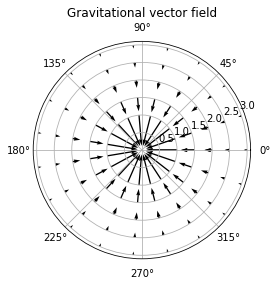

In [160]:
plot_gfield()

Meanwhile, the gravitational potential $\Phi$ is given by:

$$
\Phi(r) = -\frac{GM}{r}
$$

In [24]:
def calc_div_grav():
    %matplotlib inline
    G = 1
    M = 1
    radii = np.linspace(0.4, 7, 50)
    thetas = np.linspace(0, 2 * np.pi, 50)
    R, T = np.meshgrid(radii, thetas)
    Phi = -(G * M)/(R)
    
    # convert r, theta coordinates to
    # cartesian x, y coordinates
    X, Y = R*np.cos(T), R*np.sin(T)
    
    f = plt.figure(figsize=(7, 7))
    ax = f.add_subplot(projection="3d")
    # Set the angle of the camera
    ax.view_init(25, -45)
    ax.set_zlim(-3, 3)
    
    # Colormap
    cmap = LinearSegmentedColormap.from_list("", ["#D54C90", "#A37DF8", "#B3E6FF"])
    ax.plot_surface(X, Y, Phi,linewidth=0.1 ,
                    cmap=cmap,
                    alpha=1,
                    cstride=2,
                    rstride=2,
                    edgecolors="black")
    plt.title("Gravitational potential field $\Phi$")
    plt.grid()
    plt.rcParams["figure.autolayout"] 
    plt.show()

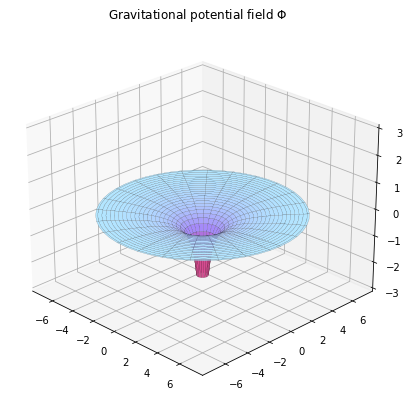

In [25]:
calc_div_grav()

The gravitational potential field $\Phi$ is related to the gravitational field by the relation:

$$
\vec g = - \nabla \Phi
$$

Combining the two equations, we can find the gravitational potential in terms of its mass density (or more precisely, mass-energy density, due to mass-energy equivalence):

$$
\nabla \cdot - \nabla \Phi = \nabla^2 \Phi = 4 \pi G \rho
$$

This is **Poisson's equation**:

$$
\nabla^2 \Phi = 4 \pi G \rho
$$

In empty space, the equation reduces to:

$$
\nabla^2 \Phi = 0
$$

## Differential geometry in General Relativity

In Minkowski spacetime, which is flat, the line element is given by:

$$
ds^2 = -c^2 dt^2 + dx^2 + dy^2 + dz^2
$$

So the Minkowski metric tensor $\eta$ is given as:

$$
\eta_{\alpha \beta} =
\begin{pmatrix}
-1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

With Einstein notation we can rewrite the element as:

$$
ds^2 = \eta_{\alpha \beta} dx^\alpha dx^\beta
$$

One other important relation is:

$$
ds^2 = c^2 d \tau^2
$$

Why the need for a metric tensor? Imagine we had two vectors, $x^\mu$ and $x^\nu$ (where again, $\mu$ and $\nu$ are summed-over indices). Their product would be given by:

$$
x^\mu \cdot x^\nu = x^\mu e_\mu x^\nu e_\nu = g_{\mu \nu} x^\mu x^\nu
$$

This is why we need a metric tensor. Note that, as we saw before, the metric tensor is a rank-2 tensor, as it is the tensor product of two rank-1 vectors (which are contravariant tensors).

Also note that we often use the metric tensor for raising or lowering indices via tensor contraction. Thus:

$$
T_\beta = g_{\alpha \beta} T^\alpha
$$

$$
T^\beta = g^{\alpha \beta} T_\alpha
$$

And if we multiply the metric tensor by its inverse, we get the identity matrix, equal to the Kronecker delta, which yields a scalar:

$$
g^{\alpha \beta} g_{\alpha \beta} = \delta^\alpha_{\: \alpha} = 1
$$

Tensors in general relativity also obey several crucial symmetries. A symmetric tensor is one in the form:

$$
T_{\alpha \beta} = T_{\beta \alpha}
$$

Whereas an antisymmetric tensor is in the form:

$$
T_{\alpha \beta} = - T_{\beta \alpha}
$$

The double contraction of a symmetric tensor $S^{\alpha \beta}$ and antisymmetric tensor $A_{\alpha \beta}$ is zero:

$$
A_{\alpha \beta} S^{\alpha \beta} = 0
$$

### Differential Geometry Practice

**Problem** 

In spherical coordinates $(r, \theta, \phi)$ we are given a vector and covector, as follows:

$$
A^\mu = \begin{bmatrix} 1 \\ r \\ 0 \end{bmatrix},
B_\mu = \begin{bmatrix} 0 & -r^2 & \cos^2 (\theta) \end{bmatrix}
$$

Let's first try to find $A_\mu$. To lower the index, we multiply $A^\mu$, our vector, by the metric tensor:

$$
A_\mu = g_{\mu \nu} A^\mu
$$

Recall that the metric tensor is 0 in all but the diagonals, and in spherical coordinates, the diagonals are $g_{rr} = 1$, $g_{\theta \theta} = r^2$, and $g_{\phi \phi} = r^2 \sin^2 (\theta)$. Therefore:

$$
A_\mu = 
\begin{bmatrix}
g_{rr} A^r & g_{\theta \theta} A^\theta & g_{\phi \phi} A^\phi
\end{bmatrix}
$$

Thus, evaluating each component of $A_\mu$ gives us:

$$
A_\mu = 
\begin{bmatrix}
(1)(1) & (r)(r^2) & (r^2 \sin^2 (\theta))(0)
\end{bmatrix}
$$

$$
A_{\mu} = \begin{bmatrix}
1 & r^3 & 0
\end{bmatrix}
$$

Now, let's try to find $B^\mu$. To raise the index, we multiply $B_\mu$, our covector, by the inverse metric tensor:

$$
B^\mu = g^{\mu \nu} B_\mu
$$

$$
B^\mu = 
\begin{bmatrix}
g^{rr} B_\mu \\ g^{\theta \theta} B^\mu \\ g^{\phi \phi} B_\mu
\end{bmatrix}
$$

The calculations should be fairly straightforward and lead us to find that:

$$
B^\mu =
\begin{bmatrix}
(1)(0) \\
\left(\frac{1}{r^2}\right) (-r^2) \\
\left(\frac{1}{r^2 \sin^2 (\theta)}\right) (\cos^2 (\theta))
\end{bmatrix}
$$

Therefore:

$$
B^\mu =
\begin{bmatrix}
0 \\
-1 \\
\frac{1}{r^2 \tan^2 (\theta)}
\end{bmatrix}
$$

After doing all of these calculations with tensors, why do we need to use them at all? It's because **tensor equations take the same form in any coordinate system**. Here's a demonstration:

Suppose we have a physical law written with tensors defined as:

$$
R_{a_1 a_2} = 0
$$

Now, let's transform this law into another coordinate system. Using the tensor transformation law, we can find our transformed tensor $R_{a_1' a_2'}$:

$$
R_{a_1' a_2'} = \frac{\partial x^{a_1}}{\partial x^{a_1'}} \frac{\partial x^{a_2}}{\partial x^{a_2'}} R_{a_1 a_2}
$$

Substituting this into the equation, we get:

$$
R_{a_1' a_2'} = 0
$$

$$
\frac{\partial x^{a_1}}{\partial x^{a_1'}} \frac{\partial x^{a_2}}{\partial x^{a_2'}} (R_{a_1 a_2}) = 0
$$

If we rearrange the equation by dividing the term with the derivatives, we find that:

$$
R_{a_1 a_2} = 0
$$

So our law takes the same form, no matter which coordinate system you use!